In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, pi, log, sqrt, tanh, atanh
import cmath
import import_ipynb

## Importation of Spectral tools
from Spectral_tools import * #D1_CL, D2_CL,matrice_random, norm_2, Pseudospectrum



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

importing Jupyter notebook from Spectral_tools.ipynb


In [2]:
# Number of points n= N+1
#N = 100
def Matrix_Eigenvalues_Test(N,a,b,c,epsilon_Random_V):

    # Spectral Differentiation, identity and Zero matrices
    #=====================================================
    xt = [D1_CL(N)[0]]
    #xt = [D1_CG(N)[0]]
    x = np.transpose(xt)
    D1 = D1_CL(N)[1]
    D2 = D2_CL(N)[1]
    #D1 = D1_CG(N)[1]
    #D2 = D2_CG(N)[1]
    Id = np.eye(N+1)
    Zero = np.zeros((N+1,N+1))

    ### Matrix L definition
    #L = D1
    #LT = L.transpose()
    #LTL = np.dot(LT,L)
    #L_red = L[1:N+1,1:N+1]
    
    # Random Potential
    #=================    
    ##epsilon = 0.#1e-6
    ##V = 1. + epsilon1*np.cos((2*NN+1)/2.*pi*x)
    V_random = matrice_random(N+1) #- 0.5*Id
    ##V_random = Diagonal_Random_Matrix(N+1) - 0.5*Id
    V_random = V_random/norm_2(V_random)
    V_random = epsilon_Random_V * V_random
    #visualisation_matrix(V_random)
    ##print("Random matrix : ", V_random)
    norm_V_random = norm_2(V_random)
    #print("L2-norm of Random_Matrix = " ,  norm_V_random, "\n")
    #print("log_10 (L2-norm of Random_Matrix) = " , log(norm_V_random,10), "\n")


    # Operator [-1,1]
    #================
    L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id + V_random
    Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
    B = (1-x**2)*Id
    # Operator [0,1]
    #================
    #x = 1./2.*(x+1)
    #L = a*x*(1-x)*(4*D2) +(2*a*(1-2*x)+b*x*(1-x))*(2*D1) + (-2*a+b*(1-2*x)+c*x*(1-x))*Id #+ V_random
    #B = x*(1-x)*Id
    
    #Pseudospectrum
    #==============
    ##heights = np.arange(0.0001, 0.001, 0.00025)
    xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -20., 500., -200., 200., 75, 75
    heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
    fl = "f"
    ##print("heights =", heights)
    Pseudospectrum(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,log(norm_V_random,10))
    
    # Eigenvalues
    eigenvalues_L, eigenvectors_L = LA.eig(L,B)
    #eigenvalues_L = LA.eigvals(L,B)
    
    #print("x=", x)
    #print("\n Eigenvalues_test = \n", np.sqrt(eigenvalues_L)/pi)
    #print("\n Eigenvalues_test = \n", eigenvalues_L)
    

    
    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    #print("Re(s_n) = ", eigenvalues_L_Re )
    #print("Im(s_n) = ", eigenvalues_L_Im )

    
    return eigenvalues_L_Re, eigenvalues_L_Im, eigenvectors_L, x, xt

    #print(D1_CL(N))
    #print(D1_CL(N)[0])
    #print(D1_CL(N)[1])

    #x_CL, D1_CL = D1_CL(N)
    #D2_CL = D2_CL(N)[1]
    #print("Chebyshev-Lobatto grid points = ", x_CL)
    #print("D1_CL = ", D1_CL)
    #print("D2_CL = ", D2_CL)

In [14]:
def Eigenvalues_Graphic(Re_lambda, Im_lambda):
    # Graphical ouput

    eigenvalues_L_Re, eigenvalues_L_Im = Re_lambda, Im_lambda
    
    #print(eigenvalues_L_Re)
    #print(eigenvalues_L_Im)
    
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    ax1.plot(eigenvalues_L_Re, eigenvalues_L_Im, "+")
    ax1.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax1.set_ylabel(r'$\mathrm{Im}(\omega_n)$')  
    #ax1.set_aspect('equal','datalim')
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax1.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax1.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig1.suptitle(r'Eigenvalues of $L$ with $n=N+1=%5g$ points' %(N+1))
    ax1.grid()   
    ax1.set_xlim(-20.,500)
    ax1.set_ylim(-200,200)
    #ax1.axis([-10,10,-1.,2])

    fig1.show()
    #fig.savefig("/home/jaramillo/Dropbox/Trabajo/Programacion/Python/Diagonalization/Eigenvalues_L.pdf")
    fig1.savefig("Figures/Eigenvalues_2ndOrderOperator_abc.pdf")

/home/jaramillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


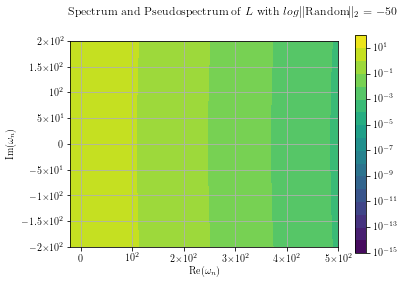

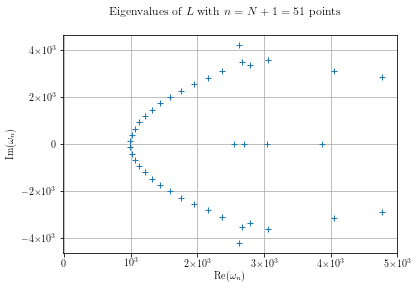

In [15]:
N = 50
#a, b, c = -1, 70, 1
a, b, c = -1, 30, 1
epsilon_Random_V = 1e-50
lambda_Re, lambda_Im, eigenvectors_L, x, xt = Matrix_Eigenvalues_Test(N,a,b,c,epsilon_Random_V)
Eigenvalues_Graphic(lambda_Re,lambda_Im)

In [171]:
# Data
#=====
N = 30
a, b, c = -1, 1, 1
epsilon_Random_V = 1e-50

# Tecnhnical ingredients
#=======================
#xt = [D1_CL(N)[0]]
#x = np.transpose(xt)
    #D1 = D1_CL(N)[1]
    #D2 = D2_CL(N)[1]
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Zero = np.zeros((N+1,N+1))

# Operator L
#===========
print("Operator L\n")
print("==========\n\n")

lambda_Re, lambda_Im, eigenvectors_L, x, xt = Matrix_Eigenvalues_Test(N,a,b,c,epsilon_Random_V)
print("Right eigenvalues = ", lambda_Re+1j*lambda_Im, "\n")
#print("Right eigenvectors = ", eigenvectors_L, "\n\n")

k=N-4
#Test 1
#======
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id
#print("shape L = ", np.shape(L))

eigenvect = eigenvectors_L[:,k]
#eigenvect.transpose()
eigenvalue = (lambda_Re[k]+1j*lambda_Im[k])
#print("eigenvect =", eigenvect, "\n")
#print("shape eigenvect = ", np.shape(eigenvect))
print("eigenvalue =", eigenvalue, "\n\n")

#test1 = np.dot(L,eigenvect)- eigenvalue*np.dot((1-x**2)*Id,eigenvect) #
#print("L phi - lambda phi = ", test1, "\n\n")

#Test 2
#======
L_orig = a*D2 + b*D1 + c*Id
eigenvect_orig = np.dot((1-x**2)*Id,eigenvect)
D1eigenvect_orig =  np.dot(D1,eigenvect_orig)
D2eigenvect_orig =  np.dot(D2,eigenvect_orig)
print("eigenvect_orig =", eigenvect_orig, "\n")
print("D1eigenvect_orig =", D1eigenvect_orig, "\n")
print("D2eigenvect_orig =", D2eigenvect_orig, "\n\n")
#test2 = np.dot(L_orig,eigenvect_orig)- eigenvalue*eigenvect_orig #
#print("L_orig phi_orig - lambda phi_orig = ", test2, "\n\n")

#Domain LLadj_orig
#=============
print("phi(-1) = ", eigenvect_orig[N],"\n")
print("phi(1) = ", eigenvect_orig[0],"\n")
print("Domain L*Ladj (expressions must vanish)\n")
print("a*D2phi(-1) - b*D1phi(-1) = ", a*D2eigenvect_orig[N]-b*D1eigenvect_orig[N],"\n")
print("a*D2phi(1)  - b*D1phi(1) = ", a*D2eigenvect_orig[0]-b*D1eigenvect_orig[0],"\n")
print("Domain Ladj*L (expressions must vanish)")
print("a*D2phi(-1) + b*D1phi(-1) = ", a*D2eigenvect_orig[N]+b*D1eigenvect_orig[N],"\n")
print("a*D2phi(1)  + b*D1phi(1) = ", a*D2eigenvect_orig[0]+b*D1eigenvect_orig[0],"\n\n\n\n")





# Operator Ladj
#===========
print("Operator LAdj\n")
print("=============\n\n")

lambdaAdj_Re, lambdaAdj_Im, eigenvectors_LAdj, x, xt = Matrix_Eigenvalues_Test(N,a,-b,c,epsilon_Random_V)
print("Right eigenvalues = ", lambdaAdj_Re+1j*lambdaAdj_Im, "\n")
#print("Right eigenvectors = ", eigenvectors_L, "\n\n")

k=N-3
#Test 1
#======
L = a*(1-x**2)*D2 + (-4*a*x - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
#print("shape L = ", np.shape(L))

eigenvect = eigenvectors_LAdj[:,k]
#eigenvect.transpose()
eigenvalue = (lambdaAdj_Re[k]+1j*lambdaAdj_Im[k])
#print("eigenvect =", eigenvect, "\n")
#print("shape eigenvect = ", np.shape(eigenvect))
print("eigenvalue =", eigenvalue, "\n\n")

test1 = np.dot(L,eigenvect)- eigenvalue*np.dot((1-x**2)*Id,eigenvect) #
print("L phi - lambda phi = ", test1, "\n\n")

#Test 2
#======
L_orig = a*D2 - b*D1 + c*Id
eigenvect_orig = np.dot((1-x**2)*Id,eigenvect)
D1eigenvect_orig =  np.dot(D1,eigenvect_orig)
D2eigenvect_orig =  np.dot(D2,eigenvect_orig)
print("eigenvect_orig =", eigenvect_orig, "\n")
print("D1eigenvect_orig =", D1eigenvect_orig, "\n")
print("D2eigenvect_orig =", D2eigenvect_orig, "\n\n")
test2 = np.dot(L_orig,eigenvect_orig)- eigenvalue*eigenvect_orig #
print("L_orig phi_orig - lambda phi_orig = ", test2, "\n\n")

#Domain LLadj_orig
#=============
print("phi(-1) = ", eigenvect_orig[N],"\n")
print("phi(1) = ", eigenvect_orig[0],"\n")
print("Domain L*Ladj (expressions must vanish)\n")
print("a*D2phi(-1) - b*D1phi(-1) = ", a*D2eigenvect_orig[N]-b*D1eigenvect_orig[N],"\n")
print("a*D2phi(1)  - b*D1phi(1) = ", a*D2eigenvect_orig[0]-b*D1eigenvect_orig[0],"\n")
print("Domain Ladj*L (expressions must vanish)")
print("a*D2phi(-1) + b*D1phi(-1) = ", a*D2eigenvect_orig[N]+b*D1eigenvect_orig[N],"\n")
print("a*D2phi(1)  + b*D1phi(1) = ", a*D2eigenvect_orig[0]+b*D1eigenvect_orig[0],"\n")





Operator L



Right eigenvalues =  [           inf+0.j 3.09979854e+04+0.j 3.14351358e+04+0.j
 6.63900109e+03+0.j 6.74417148e+03+0.j 2.83492178e+03+0.j
 2.88216718e+03+0.j 1.64781849e+03+0.j 1.61666300e+03+0.j
 1.11950504e+03+0.j 1.08695564e+03+0.j 8.71861883e+02+0.j
 8.12594042e+02+0.j 7.11717100e+02+0.j 6.33306579e+02+0.j
 5.56376119e+02+0.j 4.84863124e+02+0.j 4.18240683e+02+0.j
 3.56555761e+02+0.j 2.99805533e+02+0.j 2.47990110e+02+0.j
 2.01109489e+02+0.j 1.59163670e+02+0.j 1.22152654e+02+0.j
 9.00764396e+01+0.j 3.71740110e+00+0.j 1.11196044e+01+0.j
 2.34566099e+01+0.j 6.29350275e+01+0.j 4.07284176e+01+0.j
            inf+0.j] 

eigenvalue = (11.119604401089386+0j) 


eigenvect_orig = [ 0.00000000e+00  3.15844285e-03  1.24872395e-02  2.75047685e-02
  4.72841251e-02  7.03209466e-02  9.44495944e-02  1.16887447e-01
  1.34471044e-01  1.44099713e-01  1.43327723e-01  1.30967651e-01
  1.07520701e-01  7.52662730e-02  3.79319626e-02 -2.27265914e-16
 -3.41671834e-02 -6.11371953e-02 -7.89382894e